Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 10 - From single to many degrees of freedom

[1.   The stiffness and mass matrices](#section_1)  
[1.1. Stiffness matrix from flexibility coefficients](#section_11)  
[1.2. Lumped mass matrix](#section_12)  
[2.   Beam finite element and interpolation functions](#section_2)  
[2.1. Stiffness matrix for a beam element](#section_21)  
[2.2. Consistent mass matrix for a beam element](#section_22)  
[3.   Experimental model with 3 d.o.f.](#section_3)  
[3.1. Stiffness matrix from displacements method](#section_31)  
[2.2. Lumped mass matrix](#section_22)  
[4.   Assignment](#section_4)  

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [25]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
import pickle as pk


## 1. The stiffness and mass matrices <a name="section_1"></a> 

This notebook provides three examples of _mdof_'s (multi degrees of freedom)
systems, which will be used for demonstrations in some of the following classes. 
Each of these examples will show a different way of assembling the stiffness 
and mass matrices:

1. Stiffness matrix from flexibility coefficients, lumped mass matrix.
2. Stiffness matrix for a finite element through interpolation, consistent mass matrix
3. Stiffness matrix with the displacement method, lumped mass matrix.


## 1.1. Stiffness matrix from flexibility coefficients <a name="section_11"></a> 

As a first example (example 1), in order to introduce the mathematical representation 
of a _mdof_ system, we will make use of the [**Ftool** software for structural analysis](https://www.ftool.com.br/Ftool/), which is a free tool for analysing plane frames,
adopted in many Engineering courses at brazilian Universities.
This computer program was developed by _Prof. Luiz Fernando Martha_ from the Department of
Civil Engineering at TecGraf/PUC, Rio de Janeiro.

The program, however, is restricted to static analysis and cannot provide the dynamic response
of the modelled plane frames. 
Nevertheless, it can be used to provide the stiffness coefficients that compose the so-called
_stiffness matrix_, one of the properties required for a dynamic analysis. 

To illustrate the meaning of stiffness coefficients, we carry on an experiment over a simply
supported steel truss with 12m span length, as shown below.

<img src="images/truss12.png" alt="Isostatic truss" width="780px"/>

All truss members are made of a C-shape steel profile, as shown in the figure above. 
The experiment, which could also be thought of being performed on a real structure, 
consists in loading the truss at some chosen points and taking note of the 
corresponding displacements.
The reference loading is applied node by node, as shown below for 5 nodes (2m apart 
each other). Considering the truss simmetry, only three nodes must be loaded:

<img src="images/truss12deformed.png" alt="Isostatic truss" width="780px"/>

The resulting displacements, divided by the module of the corresponding applied load, 
can be arranged as columns in a matrix called _flexibility matrix_, $\mathbf{H}$, 
which must be symmetric as stated by Maxwell-Betti's reciprocity theorem.

Considering that the system is linear elastic, undergoing small displacements, the
superposition principle may be applied.
The total displacements of chosen nodes, is a linear combination of displacements
caused by all applied forces, what in matrix notation can be expressed as:

$$ \vec{u} = \mathbf{H} \vec{F}$$

where $\vec{u}$ is a columns vector with the total nodal displacements and $\vec{F}$ 
is a columns vector with the applied loads. 

In the truss example above, $\mathbf{H}$ is a $5 \times 5$ matrix with elements
$H_{ij}$ obtained from Ftool, as given in the Python script below
(be aware of always using pure S.I. units):


In [26]:
# Flexibility coefficients in m/N
H1 = np.array([[0.0988, 0.1320, 0.1303, 0.1022, 0.0558], 
               [0.1320, 0.2264, 0.2325, 0.1856, 0.1022], 
               [0.1303, 0.2325, 0.2833, 0.2325, 0.1303], 
               [0.1022, 0.1856, 0.2325, 0.2264, 0.1320], 
               [0.0558, 0.1022, 0.1303, 0.1320, 0.0988]])*1e-6   

F = 1000*np.array([1, 1, 1, 1, 1]).reshape(5,1)
u = np.matmul(H1,F)

print(u)

[[0.001]
 [0.001]
 [0.001]
 [0.001]
 [0.001]]


The flexibility coefficient $H_{ij}$ in matrix $\mathbf{H}$ represents the _generalized 
displacement_ at degree of freedom $i$ caused by a unit _generalized force_ applied at 
degree of freedom $j$ (and the other way around).
This is exactly the reasoning used to build the matrix in the truss example above.

The terms _generalized displacements_ and _generalized forces_ will be better explained
in a future class, but for now it suffices to say that they may refer also to rotations
and moments, respectively.

It must be said that the Ftool model behind the scenes has a total of 
$26 \times 3 = 78$ degrees of freedom (two displacements and one rotation per structural
node), but for the sake of didactic we are _simplifying_ the system by chosen some
_master_ nodes that eventually presents the largest displacements and may describe 
satisfactorily the deformed shape of the structure as a whole. 

If now we mutiply the matrix equation above by $\mathbf{H}^{-1} = \mathbf{K}$ we get:

$$ \mathbf{K} \vec{u} = \vec{F} $$

which can be recognized as an _equilibrium equation_ where the external and the 
internal forces are equated. The matrix $\mathbf{K}$ is called _stiffness matrix_. 
The stiffness coefficient $K_{ij}$ in matrix $\mathbf{K}$ represents the _generalized 
reaction_ at degree of freedom $i$ caused by a unit single _generalized displacement_ 
imposed at degree of freedom $j$ (and the other way around). 

For the truss example, we may calculate the stiffness matrix by inverting the 
flexibility matrix as:


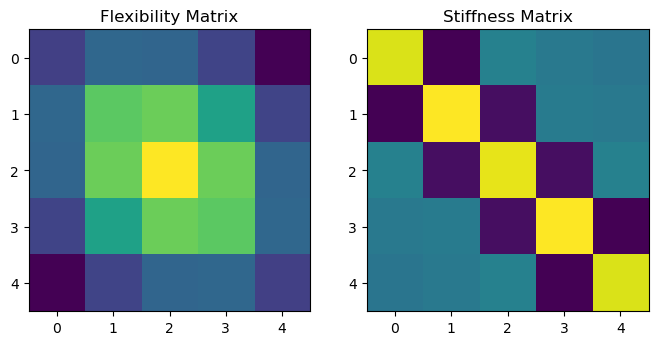

In [27]:
# Stiffness coefficients in N/m
K1 = np.linalg.inv(H1) 

# Visualizaton
plt.figure(1, figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(H1); plt.title('Flexibility Matrix');
plt.subplot(1,2,2); plt.imshow(K1); plt.title('Stiffness Matrix');


Most computer programs for structural analysis use the _finite element method_, 
where the structure is subdivided into structural elements with well defined 
elementary stiffness matrices.
The stiffness matrix representing the complete structure can be assembled by 
adding up all elementary stiffnesses in the corresponding degrees of freedom. 
This must be done with stiffness coefficients, for it is not possible to add up
flexibilities. 
Consequently, to evaluate the displacements $\vec{u}$ it becomes necessary 
to solve a linear system. This is called _static analysis_. 

For example, let us calculate the truss displacements for a uniform load of 
10kN applied to all nodes along the truss top, representing its self-weight:


In [28]:
F1 = 20000*np.ones((5,1))                 # column vector, two truss nodes per master node
u1 = np.linalg.solve(K1, F1)              # solve by the most effective numpy algorithm

print('Displacement at the truss center: {0:6.2f}mm'.format(1000*u1[2,0]))


Displacement at the truss center:  20.18mm


This result is not too far than the result provided by Ftool:

<img src="images/truss12loaded.png" alt="Isostatic truss" width="780px"/>

which is 20.48mm (error of 0.66%).
Observe that we did not use the inversion ```numpy``` method, but a more efficient solver.
Matrix inversion is computationally much more expensive than other solution algorithms
like Gauss-Jordan elimination or Cholesky factorization.
This becomes clear as one start dealing with very large systems.

For linear static analysis the stiffness matrix is all one needs. As was said before,
_structural analysis_ means using a mathematical model to represent the structure and
evaluate its _response_ to some given _load case_.
In static analysis load is regarded as static and so is the due response. 
However, in _dynamic analysis_ load is time varying and, besides the restitutive forces
represented by the stiffness matrix, the structural system will also react with 
inertial and dissipative forces.


### 1.2. Lumped mass matrix  <a name="section_12"></a> 

The most simple and direct way to account for inertial forces in this simplified model
is to lump all masses in the vicinity of each (master) node and assign these lumped
masses to the corresponding degrees of freedom.

If we define that the truss in example 1 has a distributed mass of 1000kg per unit length,
this means that to each one of the 5 model nodes will be assigned a mass equal to 
$2{\rm m} \times 1000{\rm kg/m} = 2000{\rm kg}$.
Each _nodal mass_ generates an inertial force whenever an acceleration in the corresponding
degree of freedom takes place.

Let us define the mass matrix for this example 1, to be used in following classes:


In [29]:
# Lumped mass matrix in kg
M1 = 2000*np.eye(5)

print(M1)


[[2000.    0.    0.    0.    0.]
 [   0. 2000.    0.    0.    0.]
 [   0.    0. 2000.    0.    0.]
 [   0.    0.    0. 2000.    0.]
 [   0.    0.    0.    0. 2000.]]


## 2. Beam finite element and interpolation functions <a name="section_2"></a> 

### 2.1. Stiffness matrix for a beam element  <a name="section_21"></a> 

As a second example (example 2), we derive the stiffness matrix for a very simple 
linear elastic straight beam element. 
This example is usefull to illustrate how inertial forces are accounted for 
on structural systems modelled with a finite number of degrees of freedom.
In the figure below, the transversal displacement, $u(x)$ may be approximated by
a set of displacements, $u_i$, at some control degrees of freedom (usually at the
element boundaries), interpolated by a set of functions $\varphi_i(x)$.

<img src="images/interpolation.png" alt="Isostatic truss" width="540px"/>

The interpolation is carried out as a simple linear combination:

$$ u(x) = \sum_{i = 1}^{4}{u_i \; \varphi_i(x)} = \vec{u}^{\intercal} \; \vec{\varphi}(x)$$

where the control displacements and the interpolation functions has been
arranged as column vectors.

Now we recall that the elastic potential energy, $V$, stored on a bended Bernoulli's 
beam is given by:

$$ V = \frac{1}{2} \int{EI \left[u^{\prime\prime}(x) \right]^2 \; dx} $$

where $EI$ is the beam bending stiffness. 
Replacing the interpolated version of the transversal displacement gives:

$$ \left[u^{\prime\prime}(x) \right]^2 = 
   \sum_{i = 1}^{4} {u_i \; \varphi_i^{\prime\prime}(x)} \cdot 
   \sum_{j = 1}^{4} {u_j \; \varphi_j^{\prime\prime}(x)} =
   \vec{u}^{\intercal} \left[ \vec{\varphi}^{\prime\prime}(x) \; 
                              \vec{\varphi}^{\prime\prime\intercal}(x) \right] \vec{u}$$ 

Recognizing that the control displacements are not function of $x$ leads to:

$$  V = \frac{1}{2} \; \vec{u}^{\intercal} \left\{  
        \int{EI \left[ \vec{\varphi}^{\prime\prime}(x) \; 
        \vec{\varphi}^{\prime\prime\intercal}(x) \right] dx}
        \right\} \vec{u} = 
        \frac{1}{2} \; \vec{u}^{\intercal} \mathbf{K} \,\vec{u} $$ 

The expression between curl braces is the beam element stiffness matrix, whose
elements are the stiffness coefficients calculated as:

$$ k_{ij} = \int{EI \varphi_i^{\prime\prime}(x) \varphi_j^{\prime\prime}(x)  \; dx} $$ 

The coefficients accuracy depends on the accuracy of the interpolation functions.
In the particular case of _Bernoulli's beam_ element, these functions can be the exact
solution of the elastic deformation for the imposed displacements. 
Defining $\xi = x/L$ these exact functions are:

\begin{align*}
\varphi_1(\xi) &= 1 - 3\xi^2 + 2\xi^3 \\
\varphi_2(\xi) &= L\left(\xi - 2\xi^2 + \xi^3 \right) \\
\varphi_3(\xi) &= 3\xi^2 - 2\xi^3 \\
\varphi_4(\xi) &= L\left(-\xi^2 + \xi^3 \right)
\end{align*}

Let us take a look on the respective Python plots (and let them defined as 
lambda functions):


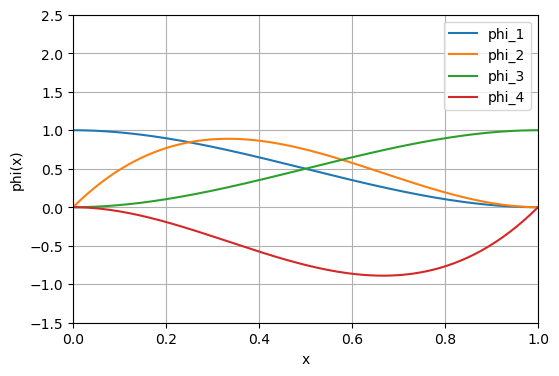

In [30]:
# Beam length discretization
L  = 6
x  = np.linspace(0, L, 200)

# Defining a list of lambda functions
phi = []
phi.append(lambda xi:  1 - 3*xi*xi + 2*xi*xi*xi)
#phi.append(lambda xi:  0.5 + 0.5*np.cos(np.pi*xi))  # FAKE!!!
phi.append(lambda xi:  L*(xi - 2*xi*xi + xi*xi*xi))
phi.append(lambda xi:  3*xi*xi - 2*xi*xi*xi)
phi.append(lambda xi:  L*(-xi*xi + xi*xi*xi ))

# Plotting
plt.figure(2, figsize=(6, 4), clear=True)

for k in range(4):
    plt.plot(x/L, phi[k](x/L))

plt.legend(('phi_1','phi_2','phi_3','phi_4'))
plt.xlim( 0.0, 1.0);  plt.xlabel('x') 
plt.ylim(-1.5, 2.5);  plt.ylabel('phi(x)') 
plt.grid(True)


The curvatures are calculated by differentiating the interpolation functions twice
(they are proportional to the corresponding bending moment diagrams):

\begin{align*}
\varphi^{\prime\prime}_1(\xi) &= \left(-6 + 12\xi \right)/L^2 \\
\varphi^{\prime\prime}_2(\xi) &= \left(-4 +  6\xi \right)/L   \\
\varphi^{\prime\prime}_3(\xi) &= \left( 6 - 12\xi \right)/L^2 \\
\varphi^{\prime\prime}_4(\xi) &= \left(-2 +  6\xi \right)/L  
\end{align*}

The matrix elements can be numerically evaluated as follows:


In [31]:
L  = 1
nL = 1000
x  = np.linspace(0, L, nL)

# Defining a list of lambda functions
phixx = []
phixx.append(lambda ξ: (-6 + 12*ξ)/L/L) 
#phixx.append(lambda ξ: -np.pi*np.pi*np.cos(np.pi*ξ)/L/L/2)   # FAKE!!!
phixx.append(lambda ξ: (-4 +  6*ξ)/L  ) 
phixx.append(lambda ξ: ( 6 - 12*ξ)/L/L) 
phixx.append(lambda ξ: (-2 +  6*ξ)/L  ) 

K = np.zeros((4,4))

for ii in range(4):
    for jj in range(4):
        K[ii,jj] = np.trapz(phixx[ii](x/L)*phixx[jj](x/L), dx=L/nL)

np.set_printoptions(precision=1)
print(K)


[[ 12.   6. -12.   6.]
 [  6.   4.  -6.   2.]
 [-12.  -6.  12.  -6.]
 [  6.   2.  -6.   4.]]


If the integrals are analytically solved for all coefficients, the beam stiffness matrix is:

$$ \mathbf{K} = \frac{EI}{L^3} \;
                \left[ \begin{array}{cccc}
                  12 &   6L   &  -12  &  6L   \\
                  6L &   4L^2 &  -6L  &  2L^2 \\
                 -12 &  -6L   &   12  & -6L   \\
                  6L &   2L^2 &  -6L  &  4L^2
                 \end{array} \right] $$

For the sake of future examples, the code below let this matrix defined
with some numerical values (example 2):


In [32]:
## steel rod 1m length with 6.5mm diameter
L  = 1.
EI = 2.05e11*(np.pi*0.0065**4)/64

# Stiffness coefficients in N/m
K2 = np.array([[ 12,   6*L,   -12,   6*L  ], 
               [ 6*L,  4*L*L, -6*L,  2*L*L], 
               [-12,  -6*L,     12, -6*L  ], 
               [ 6*L,  2*L*L, -6*L,  4*L*L]])*(EI/L/L/L) 

print('Bending stiffness: {0:5.2f}Nm2'.format(EI))
print(K2)


Bending stiffness: 17.96Nm2
[[ 215.6  107.8 -215.6  107.8]
 [ 107.8   71.9 -107.8   35.9]
 [-215.6 -107.8  215.6 -107.8]
 [ 107.8   35.9 -107.8   71.9]]


### 2.2. Consistent mass matrix for a beam element  <a name="section_22"></a> 

After evaluating the beam element stiffness matrix, one can follow the same procedure for
evaluating the corresponding mass matrix. 
If now the beam has time dependent transversal displacements, its total kinetic energy, $T$,
at a given time instant is:

$$ T = \frac{1}{2} \int{\mu \, \left[\dot{u}(x) \right]^2 \; dx} $$

where $\mu$ is the beam mass per unit length. 
Replacing the interpolated version of the transversal displacement gives:

$$ \left[ \dot{u}(x) \right]^2 = 
   \sum_{i = 1}^{4} {\dot{u}_i \; \varphi_i(x)} \cdot 
   \sum_{j = 1}^{4} {\dot{u}_j \; \varphi_j(x)} =
   \dot{\vec{u}}^{\intercal} \left[ \vec{\varphi}(x) \; 
   \vec{\varphi}^{\intercal}(x) \right] \dot{\vec{u}}$$ 

Recognizing that the control displacements are not function of $x$ leads to:

$$  T = \frac{1}{2} \; \dot{\vec{u}}^{\intercal} \left\{  
          \int{\mu \left[ \vec{\varphi}(x) \; 
          \vec{\varphi}^{\intercal}(x) \right] dx}
        \right\} \dot{\vec{u}} = 
        \frac{1}{2} \; \dot{\vec{u}}^{\intercal} \mathbf{M} \, \dot{\vec{u}} $$ 

The expression between curl braces is the beam element _consistent_ mass matrix, whose
elements are calculated as:

$$ m_{ij} = \int{\mu \; \varphi_i(x) \varphi_j(x)  \; dx} $$ 

This mass matrix is called _consistent_ because _it is evaluated by using the
same interpolation functions_ that have been used to evaluate the stiffness matrix.
These matrix elements can be numerically evaluated as follows:


In [33]:
L  = 1
nL = 10000
x  = np.linspace(0, L, nL)

M  = np.zeros((4,4))

for ii in range(4):
    for jj in range(4):
        M[ii,jj] = np.trapz(phi[ii](x/L)*phi[jj](x/L), dx=L/nL)

np.set_printoptions(precision=1)
print(420*M)


[[156.  22.  54. -13.]
 [ 22.   4.  13.  -3.]
 [ 54.  13. 156. -22.]
 [-13.  -3. -22.   4.]]


In the particular case of Bernoulli's beam, after solving analytically the integrals above, 
the consistent mass matrix results:

$$ \mathbf{M} = \frac{\mu L}{420} \; 
                \left[ \begin{array}{cccc}
                 156  &  22L   &  54   & -13L   \\
                 22L  &  4L^2  &  13L  & -3L^2  \\
                  54  &  13L   &  156  & -22L   \\
                -13L  & -3L^2  & -22L  &  4L^2
                \end{array} \right] $$

Let us define some numerical values for this matrix, completing example 2:


In [34]:
## steel rod 1m length with 6.5mm diameter
L  = 1.0
mu = 7850*(np.pi*0.0065**2)/4

# Consistent masses in kg
M2 = np.array([[ 156,   22*L,   54,   -13*L ], 
               [ 22*L,  4*L*L,  13*L, -3*L*L], 
               [ 54,    13*L,   156,  -22*L ], 
               [-13*L, -3*L*L, -22*L,  4*L*L]])*(mu*L/420) 

print('Mass per unit length: {0:5.3f}kg/m'.format(mu))

np.set_printoptions(precision=3)
print(M2)


Mass per unit length: 0.260kg/m
[[ 0.097  0.014  0.033 -0.008]
 [ 0.014  0.002  0.008 -0.002]
 [ 0.033  0.008  0.097 -0.014]
 [-0.008 -0.002 -0.014  0.002]]


## 3. Experimental model with 3 d.o.f. <a name="section_3"></a> 

As a last example (example 3), we present an experimental model that represents
an ideal 3-storey shear building. 
The model columns are regarded as massless and flexible, while the model "_floors_"
are perfectly stiff and concentrate all building mass.
The three degrees of freedom correspond to the horizontal displacements of each
floor, numbered from top to bottom.

<table>
 <tr>
   <td><img src="images/model3dof.jpeg" alt="Model with 3 d.o.f." width="160px"/></td>
   <td><img src="images/model3dof_definitions.png" alt="Model definitions" width="580px"/></td>
 </tr>
</table> 

According to the _displacements method_, the stiffness coeficients are the set of 
generalized forces that must be applied at each degree of freedom to impose a unit
generalized displacement at each degree of freedom individually, as illustrated below:

<img src="images/model3dof_stiffness.png" alt="Model definitions" width="580px"/>

Each single model columns consists of a steel strip which is 80mm long, 20mm wide 
and 0.5mm thick.
Neglecting the rotation at the connections implies that the element stiffness 
coefficient is $k = 12EI/L^3$, as calculated in example 2.
The displacements imposed to each degree of freedom must displace 2 or 4 columns,
what leads to the stiffness matrix below:


In [35]:
## steel rod 81x20x0.5mm
L  = 0.081
EI = 2.05e11*(0.02*0.0005**3)/12
k  = 12*EI/L/L/L

# Stiffness coefficients in N/m
K3 = np.array([[ 2*k, -2*k,  0  ], 
               [-2*k,  4*k, -2*k], 
               [ 0,   -2*k,  4*k]])

print(K3)

[[ 1928.718 -1928.718     0.   ]
 [-1928.718  3857.437 -1928.718]
 [    0.    -1928.718  3857.437]]


Each model floor is made up of an aluminum profile filled with lead weighting 330g.
Assigning this mass to each degree of freedom gives the lumped mass below:


In [36]:
# Lumped mass matrix in kg
M3 = np.array([[0.33,  0.00,  0.00], 
               [0.00,  0.33,  0.00], 
               [0.00,  0.00,  0.33]])


## 4. Assignments <a name="section_4"></a> 

1. Proponha um modelo de estrutura que será utilizado em todas as análises até o final da disciplina. Este modelo deverá ter uma dimensão predominante para que possa ser simplificado como tendo um layout linear (por exemplo uma ponte, passarela, treliça de cobertura, edifício alto, torre, estrutura em forma de arco, etc.). A simplificação do modelo deverá ter no mínimo 10 graus de liberdade.

2. Modele a estrutura proposta no programa F-Tool (ou outro software com a mesma capacidade) e apresente as matrizes de rigidez e de massa reduzidas. 

3. Para estruturas horizontais, calcule o deslocamento máximo por peso próprio com as matrizes simplificadas e compare este resultado com o que é dado diretamente pelo FTool. Para estruturas verticais, faça o mesmo para uma carga lateral igual a 10% do peso próprio.

Deixe tudo pronto para ser utilizado no trabalho que será passado na próxima aula.


#### Appendix: Save all matrices to be used next class.

In [37]:
with open('resources/data/sample_KM.pk', 'wb') as target:
    pk.dump((K1, M1, K2, M2, K3, M3), target)

#with open('resources/data/sample_KM.pk', 'rb') as target:
#    K1, M1, K2, M2, K3, M3 = pk.load(target)
